In [222]:
from bs4 import BeautifulSoup
import requests

data = requests.get('https://www.bukedde.co.ug/bukedde/amawulire/1503281/mao-ayise-nambooze-ekiyenje-ekyetaaga-okufuuyira')

soup = BeautifulSoup(data.text,'lxml')



In [195]:
for match in soup.find_all('div',class_ = 'article-content'):
    
    for paragraph in match.find_all('p'):
        paragraph = paragraph.text
        print(paragraph)
        print('')


						 Abed Bwanika, Nobert Mao ne Mabike mu lukuhhaana lwa bannamawulire.
					




Mao yasinzidde mu lukiiko lwa bannamawulire n’ategeeza nti ekibiina ky'akulembera kyalumbibwa ebiku, emisota, ebiyenje, enkwa n’emisege egyetaaga okuggyamu.

Yawadde eky’okulabirako ky’omubaka Nambooze gwe yagambye nti bafubye okumusembeza, kyokka ng’ebikolwa bye byonna birwanyisa ekibiina awo kwe kumuyita ekiyenje kye yagambye nti agenda kukifuuyira kiveewo.

Yakiraze nti Nambooze amaze ebbanga nga tabawagira ng’ekibiina, wadde nga ye abadde ateekamu obudde ne yeetoloola Mukono ng’amunoonyeza obululu.

Yasabye abeeyita bannakibiina okubeera abalambulukufu nga bwe baba tebakikkiririzaamu bakiveemu kubanga tekigasa okubeera mu bufumbo ng’obaliga.

Yategeezezza nti batandise okufuna eddagala okufuuyira ekibiina bagobemu enkukunyi ebiyenje, emisota ebiku enkwa nabuli kintu kyonna ekitawaanya ekibiina kubanga tosobola kwambala yinifoomu ya ttiimu eno ate n’osambira ttiimu ndala.

Yajjukizza nti DP eyaniri

In [30]:
# Use regex to isolate only the links of the page numbers, the one you click on.
page_count_links = soup.find_all("a",href=re.compile(r".*jfacet=true&page=*"))
try: # Make sure there are more than one page, otherwise, set to 1.
    num_pages = int(page_count_links[-1].get_text())
except IndexError:
    num_pages = 1

# Add 1 because Python range.
url_list = ["{}&pageNum={}".format(base_url, str(page)) for page in range(1, num_pages + 1)]
# /search?facet=true&page=2&sort=Relevance&year_based=2017
# /search?facet=true&page=3&sort=Relevance&year_based=2017
print(num_pages)


1


In [220]:
import requests
import csv
from bs4 import BeautifulSoup

domain = 'https://www.bukedde.co.ug'

# create a csv file on local machine and store scraped contents
csv_file = open('/home/saazi/Documents/datasets/bukedde_crap.csv','w')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['omutwe','omusasi','olunaku'])

for page in range(1,31):
    print('')
    print('Printing page {}'.format(page))
    url = "https://www.bukedde.co.ug/search?facet=true&page={}&sort=Relevance&year_based=2017".format(page)
    bukedde = requests.get(url)

    soup1 = BeautifulSoup(bukedde.text,'lxml')
    #html = urlopen(url)
    Title = soup1.find_all('div',class_ = 'list_discription')
    for i in Title:
        try:
            name = i.find('a')
            l = name.get('href')
            uri = domain + l
            
            try:
                bukedde2 = requests.get(uri)
                soup2 = BeautifulSoup(bukedde2.text,'lxml')
                match2 = soup2.find('div',class_ = 'top-story-block')
                omutwe2 = match2.find('h1').text.strip()
                omusasi2 = match2.find('div',class_ = 'author').p.text.strip()
                olunaku2 = match2.find('div',class_='publish-date').p.text.strip()
                csv_writer.writerow([omutwe2, omusasi2, olunaku2])
                
                if page % 2 == 0:
                    
                    print(olunaku2)
            except:
                print('Scraping failed,but do not despair')
                
        except: AttributeError
csv_file.close()


Printing page 1

Printing page 2
Added 7th August 2017
Added 7th August 2017
Added 7th August 2017
Added 7th August 2017
Added 7th August 2017
Added 7th August 2017
Added 7th August 2017
Added 7th August 2017
Added 7th August 2017
Added 8th August 2017

Printing page 3

Printing page 4
Added 12th August 2017
Added 12th August 2017
Added 12th August 2017
Added 12th August 2017
Added 12th August 2017
Added 12th August 2017
Added 12th August 2017
Added 12th August 2017
Added 14th August 2017
Added 14th August 2017

Printing page 5

Printing page 6
Added 20th August 2017
Added 20th August 2017
Added 21st August 2017
Added 22nd August 2017
Added 22nd August 2017
Added 22nd August 2017
Added 23rd August 2017
Added 24th August 2017
Added 24th August 2017
Added 27th August 2017

Printing page 7

Printing page 8
Added 1st September 2017
Added 1st September 2017
Added 1st September 2017
Added 2nd September 2017
Added 4th September 2017
Added 4th September 2017
Added 6th September 2017
Added 6th

In [33]:
for match in soup.find_all('div',class_ = 'list_discription'):
    
    for headline in match.find_all('h3'):
        headline = headline.get_text()
        #paragraph = match.find('div',class_ = 'article-adblock').p.text
        print(headline)
        print('')


Diamond bba wa Zari akkiriza okuzaala ebweru

Cranimer Kalinda aziikibwa lwa kusatu

Omwana atemyetemye kitaawe kujula kumutta lwa ttaka

Bannakenya bakedde kukuba kalulu k'Obwapulezidenti

Kayihura ayimirizza abaserikale 3 e Nansana

Museveni azudde lwe yabatizibwa

By'obadde tomanyi ku Uhuru ne Odinga ababbinkana mu kalulu k'e Kenya

Muleete abalumiriza Sheikh Mwanje okutemula Maj. Kiggundu - Kkooti

‘Mukomye engombo ya Gavumenti etuyambe’

Basabidde omwoyo gw'omugenzi Cranmer Kalinda ku St. Stephens Church e Kabowa



In [69]:
'''
REFERENCE :-> Corey M Schafer on youtube.com,Web Scraping 
'''
import csv
corey = requests.get('https://coreyms.com/')

soup_corey = BeautifulSoup(corey.text,'lxml')
csv_file = open('/home/saazi/Documents/coreyms_scrape.csv','w')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['headline','summary','video_link'])

for article in soup_corey.find_all('article'):
    headline = article.h2.a.text
    
    summary = article.find('div',class_ = 'entry-content').p.text
    print(summary)
    
    try:
        
        vid_src = article.find('iframe',class_='youtube-player')['src']
        vid_id = vid_src.split('/')[4]
        vid_id = vid_id.split('?')[0]
        yt_link = f'https://youtube.com/watch?v={vid_id}'
    except Exception as e:
        yt_link = None
            
    print(yt_link)
    print('')
    
    csv_writer.writerow([headline, summary, yt_link])
    
csv_file.close()



In this Python Programming Tutorial, we will be learning how to set up a Python development environment in VSCode on Windows. VSCode is a very nice free editor for writing Python applications and many developers are now switching over to this editor. In this video, we will learn how to install VSCode, get the Python extension installed, how to change Python interpreters, create virtual environments, format/lint our code, how to use Git within VSCode, how to debug our programs, how unit testing works, and more. We have a lot to cover, so let’s go ahead and get started…
https://youtube.com/watch?v=-nh9rCzPJ20

In this Python Programming Tutorial, we will be learning how to set up a Python development environment in VSCode on MacOS. VSCode is a very nice free editor for writing Python applications and many developers are now switching over to this editor. In this video, we will learn how to install VSCode, get the Python extension installed, how to change Python interpreters, create virtu

In [6]:
'''
SCRAPING MULTIPLE PAGES ON A WEBSITE FOR RELEVANT CONTENT
'''
from bs4 import BeautifulSoup as bsoup
import requests as rq
import re

base_url = 'http://my.gwu.edu/mod/pws/courses.cfm?campId=1&termId=201501&subjId=ACCY'
r = rq.get(base_url)

soup = bsoup(r.text)
# Use regex to isolate only the links of the page numbers, the one you click on.
page_count_links = soup.find_all("a",href=re.compile(r".*javascript:goToPage.*"))
try: # Make sure there are more than one page, otherwise, set to 1.
    num_pages = int(page_count_links[-1].get_text())
except IndexError:
    num_pages = 1

# Add 1 because Python range.
url_list = ["{}&pageNum={}".format(base_url, str(page)) for page in range(1, num_pages + 1)]

# Open the text file. Use with to save self from grief.
with open("results.txt","w") as acct:
    for url_ in url_list:
        print("Processing {}...".format(url_))
        r_new = rq.get(url_)
        soup_new = bsoup(r_new.text)
        for tr in soup_new.find_all('tr', align='center'):
            stack = []
            for td in tr.find_all('td'):
                stack.append(td.text.replace('\n', '').replace('\t', '').strip())
            acct.write(", ".join(stack) + '\n')
            

Processing http://my.gwu.edu/mod/pws/courses.cfm?campId=1&termId=201501&subjId=ACCY&pageNum=1...
Processing http://my.gwu.edu/mod/pws/courses.cfm?campId=1&termId=201501&subjId=ACCY&pageNum=2...
Processing http://my.gwu.edu/mod/pws/courses.cfm?campId=1&termId=201501&subjId=ACCY&pageNum=3...


In [241]:
import pandas as pd
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt

style.use('fivethirtyeight')
x = pd.read_csv('/home/saazi/Documents/datasets/bukedde_crap.csv')
x.head(20)

,omutwe,omusasi,olunaku
0,Diamond bba wa Zari akkiriza okuzaala ebweru,Musa Ssemwanga,19th September 2017
1,Cranimer Kalinda aziikibwa lwa kusatu,Vivien Nakitende,7th August 2017
2,Omwana atemyetemye kitaawe kujula kumutta lwa ...,Musasi wa Bukedde,7th August 2017
3,Bannakenya bakedde kukuba kalulu k'Obwapulezid...,Musasi wa Bukedde,8th August 2017
4,Kayihura ayimirizza abaserikale 3 e Nansana,peter ssaava,8th August 2017
5,Museveni azudde lwe yabatizibwa,Ali Wasswa,8th August 2017
6,By'obadde tomanyi ku Uhuru ne Odinga ababbinka...,Musasi wa Bukedde,8th August 2017
7,Muleete abalumiriza Sheikh Mwanje okutemula Ma...,Musasi wa Bukedde,8th August 2017
8,‘Mukomye engombo ya Gavumenti etuyambe’,Moses Lemisa,8th August 2017
9,Basabidde omwoyo gw'omugenzi Cranmer Kalinda k...,Vivien Nakitende,8th August 2017


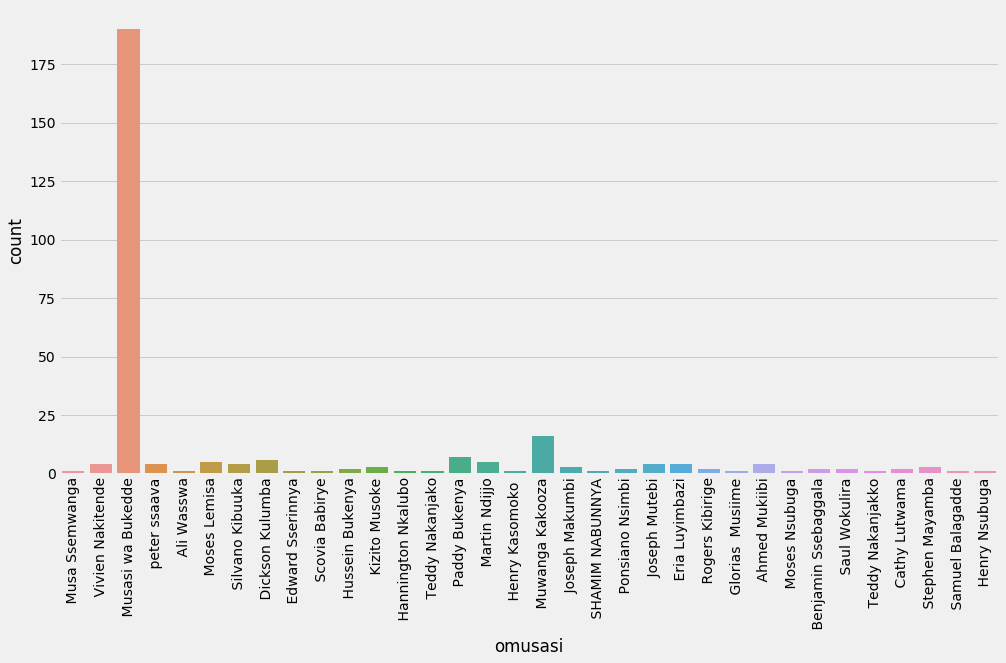

In [242]:
plt.figure(figsize=(15,8))
sns.countplot(x="omusasi",data=x)
#show the plot
plt.xticks(rotation=90)
plt.show()


In [215]:
'''
This library scrapes an english news webste's article and includes modules that parse and summarise it

REFERENCE ARTICLE ON MEDIUM :-> https://towardsdatascience.com/scrape-and-summarize-news-articles-in-5-lines-of-python-code-175f0e5c7dfc
'''
from newspaper import Article

# Ein Artikel von die New York Times auf Facebooks Libracoin
article = Article('https://www.nytimes.com/2019/07/17/technology/facebook-libra-house-hearing.html?action=click&module=Well&pgtype=Homepage&section=Business')
article.download()
print(f'ARTICLE: {article} \n')
# the article.parse() functions gets tricky with slow internet connections
article.parse()
article.nlp()
print(f'AUTHORS: {article.authors} \n')
print(f'DATE: {article.publish_date} \n')
print(f'KEYWORDS: {article.keywords} \n')
print(f'TEXT: {article.text} \n')
print(f'SUMMARY: {article.summary} \n')

ARTICLE: <newspaper.article.Article object at 0x7f3828b9a278> 

AUTHORS: ['Nathaniel Popper', 'Mike Isaac'] 

DATE: 2019-07-17 00:00:00 

KEYWORDS: ['cryptocurrency', 'day', 'libra', 'facebook', 'hearings', 'stop', 'power', 'faces', 'critical', 'reduce', 'marcus', 'working', 'facebooks', 'dont', 'second', 'expressed'] 

TEXT: Ms. Waters said she was working on new legislation that would make it illegal for big tech companies to get involved in the financial industry, which could stop Libra in its tracks.

Mr. Marcus, the executive overseeing Calibra, the Facebook subsidiary working on the project, struck a conciliatory tone for a second day and said Facebook was listening to its critics.

“I believe we are owning these mistakes and working to remedy them,” he said.

Republicans on the committee were more eager to talk about the benefits that might come from Libra, but they also expressed their concern about Facebook’s plan.

“Quite frankly, I don’t care for Facebook,” said Representati

In [244]:
# Imports
import requests
from bs4 import BeautifulSoup
from gensim.summarization import summarize

# Article on Trumps relationship with Epstein

# Retrieve page text
url_trump = 'https://www.nytimes.com/2019/07/17/us/politics/trump-jeffrey-epstein-video.html?fallback=0&recId=1OBDJdcz9AEIY2svFfAPePNE14k&locked=0&geoContinent=AF&geoRegion=C&recAlloc=top_conversion&geoCountry=UG&blockId=most-popular&imp_id=784238399&action=click&module=Most%20Popular&pgtype=Homepage'
page_trump = requests.get(url_trump).text

In [246]:
# Turn page into BeautifulSoup object to access HTML tags
soup = BeautifulSoup(page_trump)

# Get headline
headline = soup.find('h1').get_text()
print(headline)

Trump and Epstein Partied and Commented on Women in 1992 Video


In [247]:
# Get text from all <p> tags.
p_tags = soup.find_all('p')
# Get the text from each of the "p" tags and strip surrounding whitespace.
p_tags_text = [tag.get_text().strip() for tag in p_tags]
p_tags_text

['Advertisement',
 'Supported by',
 '',
 'By Maggie Haberman and Annie Karni',
 'WASHINGTON — President Trump has been playing down his relationship with Jeffrey Epstein, the wealthy financier  under federal indictment on charges of sexually trafficking and abusing girls, but at least one night they shared together in the company of dozens of N.F.L. cheerleaders was documented on camera.',
 'A newly unearthed video from 1992 shows Mr. Trump and Mr. Epstein watching and commenting on women together at an event at Mar-a-Lago, Mr. Trump’s club in Palm Beach, Fla. The video was broadcast on MSNBC’s “Morning Joe” on Wednesday morning.',
 'Dressed in a suit and a pink tie, Mr. Trump, then 46, appears to be in jovial spirits as he plays host, laughing and warmly welcoming guests, including Mr. Epstein — the man he now claims he was “never a fan of.”',
 'The video provides a glimpse of Mr. Trump in his element: moving back and forth between the dance floor, filled with cheerleaders for the Buf

In [248]:
# Filter out sentences that contain newline characters '\n' or don't contain periods.
sentence_list = [sentence for sentence in p_tags_text if not '\n' in sentence]
sentence_list = [sentence for sentence in sentence_list if '.' in sentence]
sentence_list

['WASHINGTON — President Trump has been playing down his relationship with Jeffrey Epstein, the wealthy financier  under federal indictment on charges of sexually trafficking and abusing girls, but at least one night they shared together in the company of dozens of N.F.L. cheerleaders was documented on camera.',
 'A newly unearthed video from 1992 shows Mr. Trump and Mr. Epstein watching and commenting on women together at an event at Mar-a-Lago, Mr. Trump’s club in Palm Beach, Fla. The video was broadcast on MSNBC’s “Morning Joe” on Wednesday morning.',
 'Dressed in a suit and a pink tie, Mr. Trump, then 46, appears to be in jovial spirits as he plays host, laughing and warmly welcoming guests, including Mr. Epstein — the man he now claims he was “never a fan of.”',
 'The video provides a glimpse of Mr. Trump in his element: moving back and forth between the dance floor, filled with cheerleaders for the Buffalo Bills and the Miami Dolphins, and watching from the sidelines, where at on

In [250]:
# Combine list items into string.
article = ' '.join(sentence_list)
summary = summarize(article, ratio=0.3)

print(f'Length of original article: {len(article)}')
print(f'Length of summary: {len(summary)} \n')
print(f'Headline: {headline} \n')
print(f'Article Summary:\n{summary}')

Length of original article: 4133
Length of summary: 1678 

Headline: Trump and Epstein Partied and Commented on Women in 1992 Video 

Article Summary:
WASHINGTON — President Trump has been playing down his relationship with Jeffrey Epstein, the wealthy financier  under federal indictment on charges of sexually trafficking and abusing girls, but at least one night they shared together in the company of dozens of N.F.L. cheerleaders was documented on camera.
A newly unearthed video from 1992 shows Mr. Trump and Mr. Epstein watching and commenting on women together at an event at Mar-a-Lago, Mr. Trump’s club in Palm Beach, Fla. The video was broadcast on MSNBC’s “Morning Joe” on Wednesday morning.
Dressed in a suit and a pink tie, Mr. Trump, then 46, appears to be in jovial spirits as he plays host, laughing and warmly welcoming guests, including Mr. Epstein — the man he now claims he was “never a fan of.” The video provides a glimpse of Mr. Trump in his element: moving back and forth bet

In [251]:
# Imports
import requests
from bs4 import BeautifulSoup
from gensim.summarization import summarize

# Ein Artikel auf sechszehn schwarze Amerikanische Kocher

# Retrieve page text
url_chefs = 'https://www.nytimes.com/interactive/2019/07/16/dining/black-chefs-restaurants-food.html?fallback=0&recId=1OBDJdcz9AEIY2svFfAPePNE14k&locked=0&geoContinent=AF&geoRegion=C&recAlloc=top_conversion&geoCountry=UG&blockId=most-popular&imp_id=403261259&action=click&module=Most%20Popular&pgtype=Homepage'
page_chefs = requests.get(url_chefs).text

In [257]:
# Turn page into BeautifulSoup object to access HTML tags
soup_chefs = BeautifulSoup(page_chefs)

# Get headline
headline_chefs = soup_chefs.find('h1').get_text()

# Get text from all <p> tags.
p_tags_chefs = soup_chefs.find_all('p')
# Get the text from each of the "p" tags and strip surrounding whitespace.
p_tags_text_chefs = [tag.get_text().strip() for tag in p_tags_chefs]
# Filter out sentences that contain newline characters '\n' or don't contain periods.
sentence_list_chefs = [sentence for sentence in p_tags_text_chefs if not '\n' in sentence]
sentence_list_chefs = [sentence for sentence in sentence_list_chefs if '.' in sentence]

# Combine list items into string.
article_chefs = ' '.join(sentence_list_chefs)
summary_chefs = summarize(article_chefs, ratio=0.3)

print(f'Length of original article: {len(article_chefs)}')
print(f'Length of summary: {len(summary_chefs)} \n')
print(f'Headline: {headline_chefs} \n')
print(f'Article Summary:\n{summary_chefs}')

Length of original article: 15686
Length of summary: 6618 

Headline: 16 Black Chefs Changing Food in America 

Article Summary:
When Ashleigh Shanti, 29, journeyed across the country on a six-month sabbatical last year, she decided that her next step as a chef needed to fulfill a critical desire: cooking food that celebrated her heritage as a black woman from the South and rebuffed assumptions about what that food could be.
Those are just some of the dishes featured at Benne on Eagle, in Asheville, N.C., that have helped Ms. Shanti become one of the many black chefs across the country who are considered new leaders in the food world, making their voices heard in new ways.
These chefs have crushed the notion that the food they cook must be rooted in the American South.
“In culinary school, I learned to cook at a very high level,” said JJ Johnson of Henry at Life Hotel restaurant in Manhattan.
Black cooks have historically seen their foods and techniques co-opted, getting little credit 